In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the data
names=['status_of_exst_checking_acnt',
      'duration_mth', 'credit_hist', 'purpose', 'credit_amnt', 'savings_acnt', 'employment_since',
      'instal_rate', 'status', 'oth_gurantors', 'prsnt_res_since', 'property', 'age', 'oth_plans',
      'housing', 'num_exst_credit', 'job', 'num_liable', 'tele', 'foreign_wrkr', 'target']
df = pd.read_csv(r'/Users/akash/Desktop/Trainings/vmw/data/german.data', delimiter=" ", header=None, names=names)

In [3]:
df.head()

,status_of_exst_checking_acnt,duration_mth,credit_hist,purpose,credit_amnt,savings_acnt,employment_since,instal_rate,status,oth_gurantors,...,property,age,oth_plans,housing,num_exst_credit,job,num_liable,tele,foreign_wrkr,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   status_of_exst_checking_acnt  1000 non-null   object
 1   duration_mth                  1000 non-null   int64 
 2   credit_hist                   1000 non-null   object
 3   purpose                       1000 non-null   object
 4   credit_amnt                   1000 non-null   int64 
 5   savings_acnt                  1000 non-null   object
 6   employment_since              1000 non-null   object
 7   instal_rate                   1000 non-null   int64 
 8   status                        1000 non-null   object
 9   oth_gurantors                 1000 non-null   object
 10  prsnt_res_since               1000 non-null   int64 
 11  property                      1000 non-null   object
 12  age                           1000 non-null   int64 
 13  oth_plans          

In [5]:
df.target.value_counts()

1    700
2    300
Name: target, dtype: int64

In [6]:
df.nunique()

status_of_exst_checking_acnt      4
duration_mth                     33
credit_hist                       5
purpose                          10
credit_amnt                     921
savings_acnt                      5
employment_since                  5
instal_rate                       4
status                            4
oth_gurantors                     3
prsnt_res_since                   4
property                          4
age                              53
oth_plans                         3
housing                           3
num_exst_credit                   4
job                               4
num_liable                        2
tele                              2
foreign_wrkr                      2
target                            2
dtype: int64

### Preparing data for EDA to test few Hypothesis

#### Hypothesis testing is done with the help of statistical test after this section. This section of notebook is making inference from the graphs.

In [7]:
df_viz = df.copy(deep=True)

In [8]:
d1 = {'A11' : '... < 0 DM','A12' : '0 <= ... < 200 DM',
      'A13' : '... >= 200 DM / salary assignments for at least 1 year','A14' : 'no checking account'}

d3 = {'A30' : 'no credits taken/ all credits paid back duly',
'A31' : 'all credits at this bank paid back duly',
'A32' : 'existing credits paid back duly till now',
'A33' : 'delay in paying off in the past',
'A34' : 'critical account/ other credits existing (not at this bank)'}

d4 = {'A40' : 'car (new)',
'A41' : 'car (used)',
'A42' : 'furniture/equipment',
'A43' : 'radio/television',
'A44' : 'domestic appliances',
'A45' : 'repairs',
'A46' : 'education',
'A47' : '(vacation - does not exist?)',
'A48' : 'retraining',
'A49' : 'business',
'A410' : 'others'}

d6 = {'A61' : '... < 100 DM',
'A62' : '100 <= ... < 500 DM',
'A63' : '500 <= ... < 1000 DM',
'A64' : '.. >= 1000 DM',
'A65' : 'unknown/ no savings account'}

d7 = {'A71' : 'unemployed',
'A72' : '... < 1 year',
'A73' : '1 <= ... < 4 years',
'A74' : '4 <= ... < 7 years',
'A75' : '.. >= 7 years'}

d9 = {'A91' : 'male : divorced/separated',
'A92' : 'female : divorced/separated/married',
'A93' : 'male : single',
'A94' : 'male : married/widowed',
'A95' : 'female : single'}

d10 = {'A101' : 'none',
'A102' : 'co-applicant',
'A103' : 'guarantor'}

d12 = {'A121' : 'real estate',
'A122' : 'if not A121 : building society savings agreement/ life insurance',
'A123' : 'if not A121/A122 : car or other, not in attribute 6',
'A124' : 'unknown / no property'}

d14 = {'A141' : 'bank',
'A142' : 'stores',
'A143' : 'none'}

d15 = {'A151' : 'rent',
'A152' : 'own',
'A153' : 'for free'}

d17 = {'A171' : 'unemployed/ unskilled - non-resident',
'A172' : 'unskilled - resident',
'A173' : 'skilled employee / official',
'A174' : 'management/ self-employed/highly qualified employee/ officer'}

d19 = {'A191' : 'none',
'A192' : 'yes, registered under the customers name'}

d20 = {'A201' : 'yes',
'A202' : 'no'}

In [9]:
df_viz.replace({'status_of_exst_checking_acnt': d1, 'credit_hist': d3, 'purpose':d4,
               'savings_acnt': d6, 'employment_since': d7, 'status': d9, 'oth_gurantors': d10,
               'property': d12, 'oth_plans': d14, 'housing': d15, 'job': d17, 'tele': d19, 'foreign_wrkr': d20, 
               'target': {1: 'good', 2: 'bad'}}, inplace=True)
df_viz.head()

,status_of_exst_checking_acnt,duration_mth,credit_hist,purpose,credit_amnt,savings_acnt,employment_since,instal_rate,status,oth_gurantors,...,property,age,oth_plans,housing,num_exst_credit,job,num_liable,tele,foreign_wrkr,target
0,... < 0 DM,6,critical account/ other credits existing (not ...,radio/television,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,good
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,radio/television,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,good
3,... < 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes,good
4,... < 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,bad


In [10]:
sns.set_theme(style="darkgrid")
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

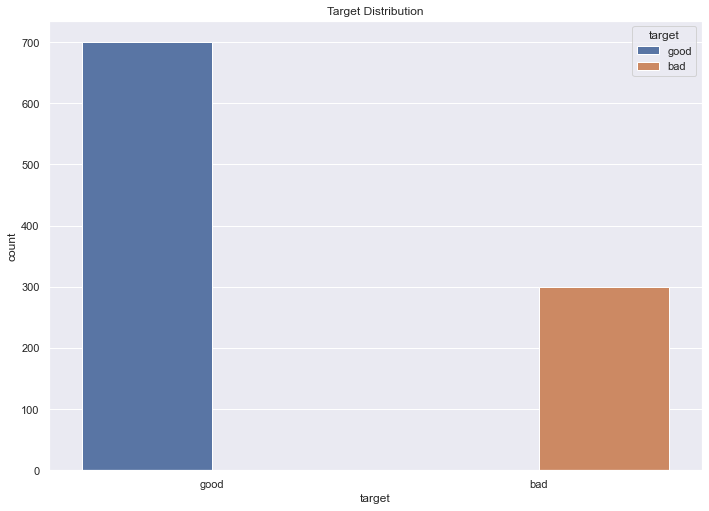

In [11]:
sns.countplot(x='target', data=df_viz, hue='target')
plt.title('Target Distribution')
plt.show()

#### From the dataset it is clear that the distribution of the target variable is not balanced. Hence, its an imbalanced dataset problem.

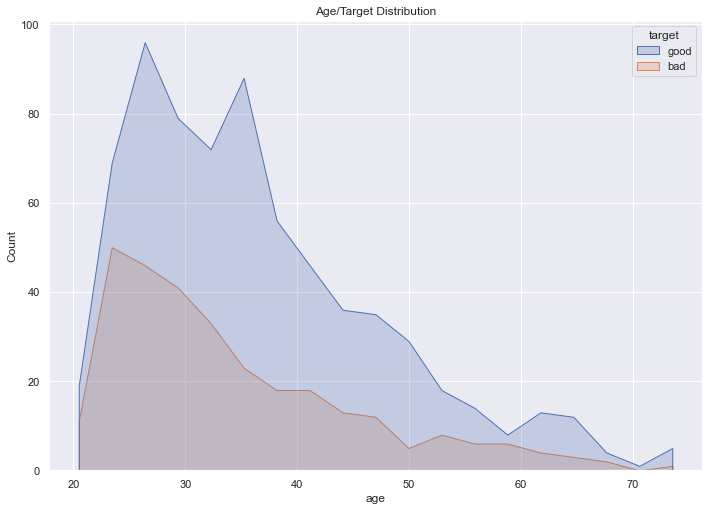

In [12]:
sns.histplot(x='age', data=df_viz, hue='target', element="poly")
plt.title('Age/Target Distribution')
plt.show()

#### Most of the defaulters come from the younger age band.

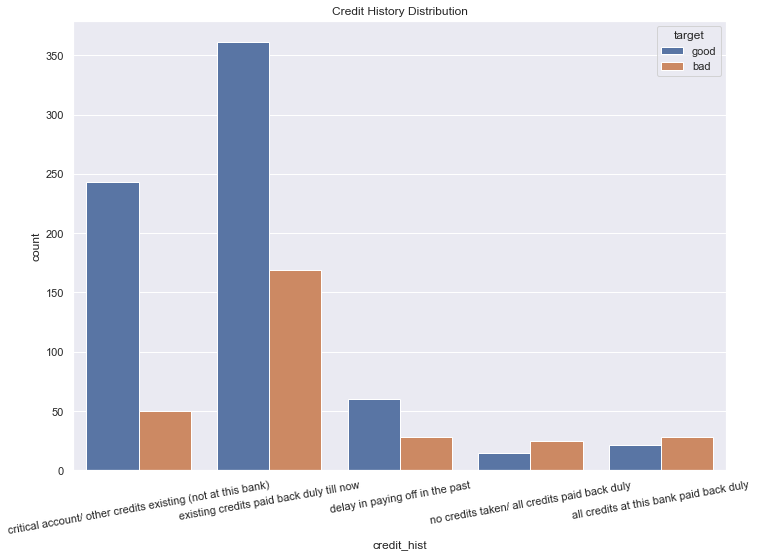

In [13]:
sns.countplot(x='credit_hist', data=df_viz, hue='target')
plt.title('Credit History Distribution')
plt.xticks(rotation=10)
plt.show()

#### Most of the defaulters have a good credit history as it is clear from data description that they have paid off their credits/no credits taken.

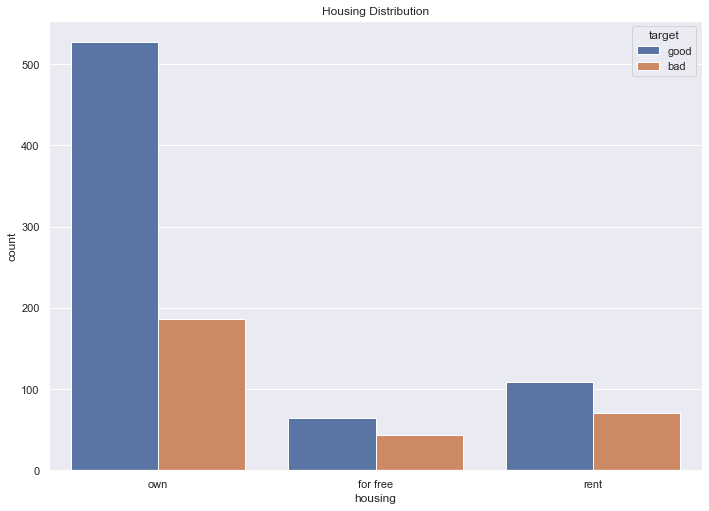

In [14]:
sns.countplot(x='housing', data=df_viz, hue='target')
plt.title('Housing Distribution')
plt.show()

#### Most defaulters have there their own houses. But, the chances of someone housing for free/rent to be a defaulter is high.

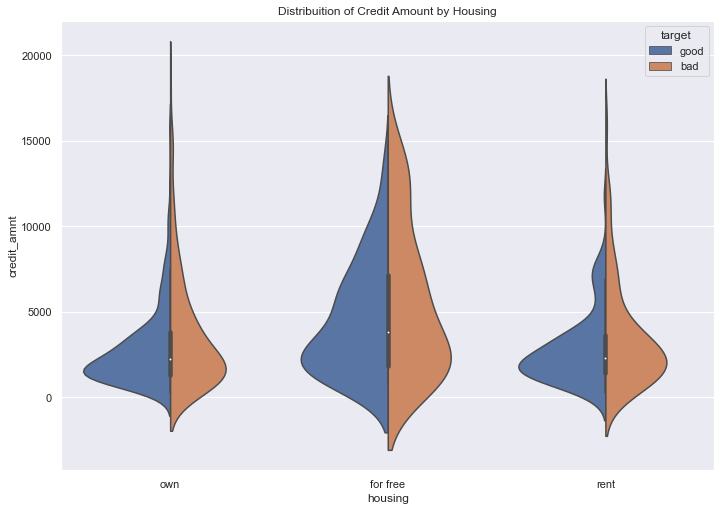

In [15]:
sns.violinplot(x='housing', y='credit_amnt', data=df_viz, hue='target', split=True)
plt.title('Distribuition of Credit Amount by Housing')
plt.show()

#### Although, a significant chunk of credit amount has been taken by the users who live for free.

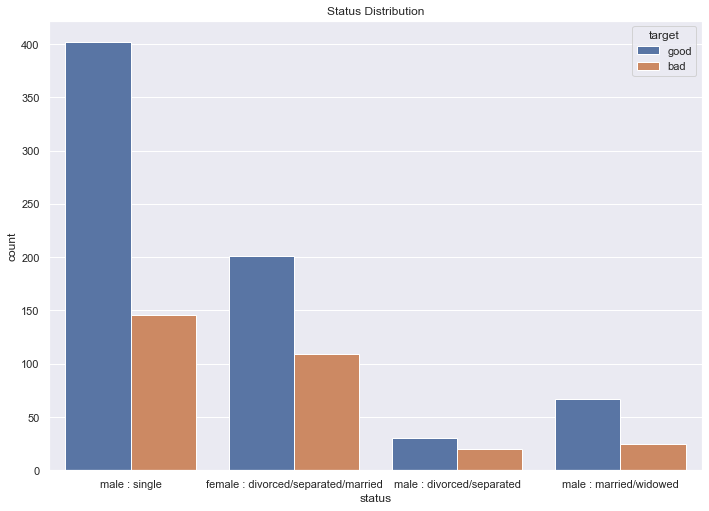

In [16]:
sns.countplot(x='status', data=df_viz, hue='target')
plt.title('Status Distribution')
plt.show()

#### Defaulters propotion by status/sex seems to be similar. Though, from the below graph it is evident that the defaulters in the male have a higher credit amount associated with them.

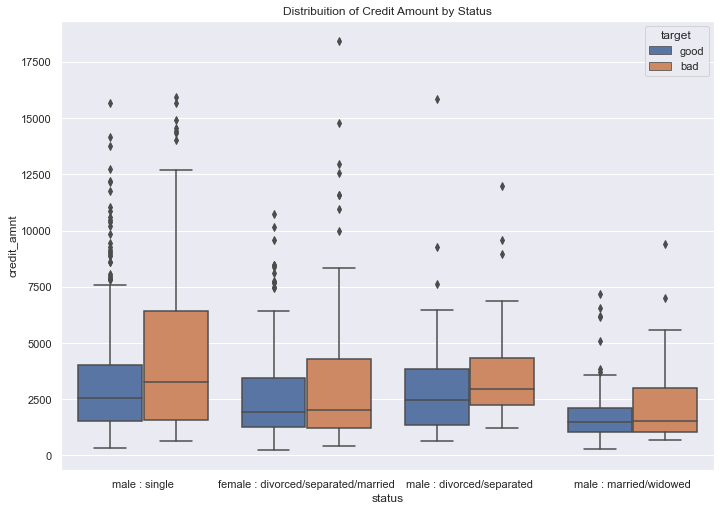

In [17]:
sns.boxplot(x='status', y='credit_amnt', data=df_viz, hue='target')
plt.title('Distribuition of Credit Amount by Status')
plt.show()

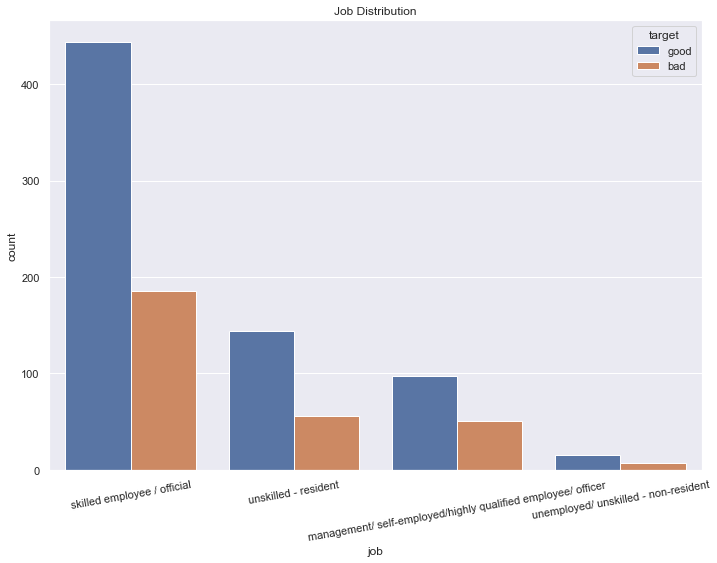

In [18]:
sns.countplot(x='job', data=df_viz, hue='target')
plt.title('Job Distribution')
plt.xticks(rotation=10)
plt.show()

#### There seems to be no such major difference in the proportions of the defaulters when they are compared by the kind of work they do. But, 'management/ self-employed/highly qualified employee/ officer' generally have taken credits of higher amount compared to others.

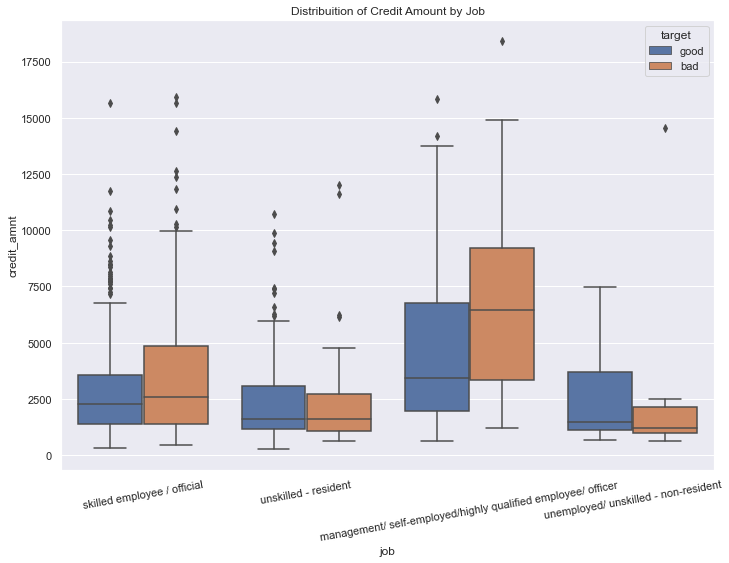

In [19]:
sns.boxplot(x='job', y='credit_amnt', data=df_viz, hue='target')
plt.title('Distribuition of Credit Amount by Job')
plt.xticks(rotation=10)
plt.show()

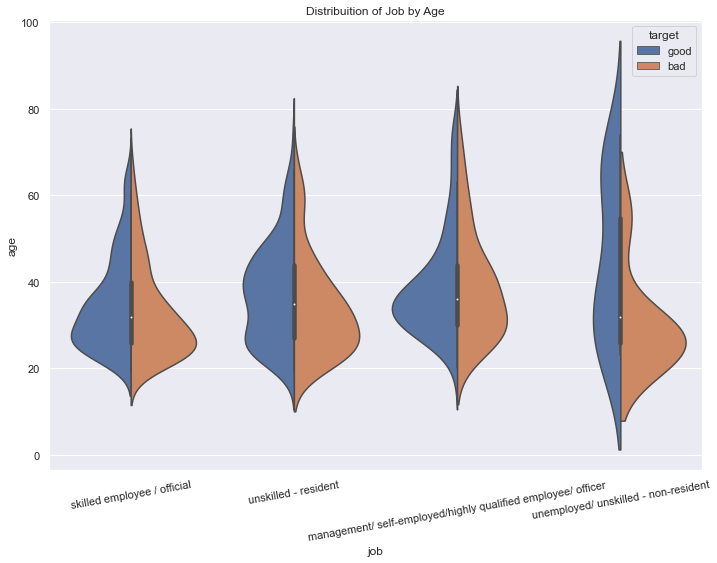

In [20]:
sns.violinplot(x='job', y='age', data=df_viz, hue='target', split=True)
plt.title('Distribuition of Job by Age')
plt.xticks(rotation=10)
plt.show()

#### Most of the defaulters across all the job types are in there 20's to early 30's.

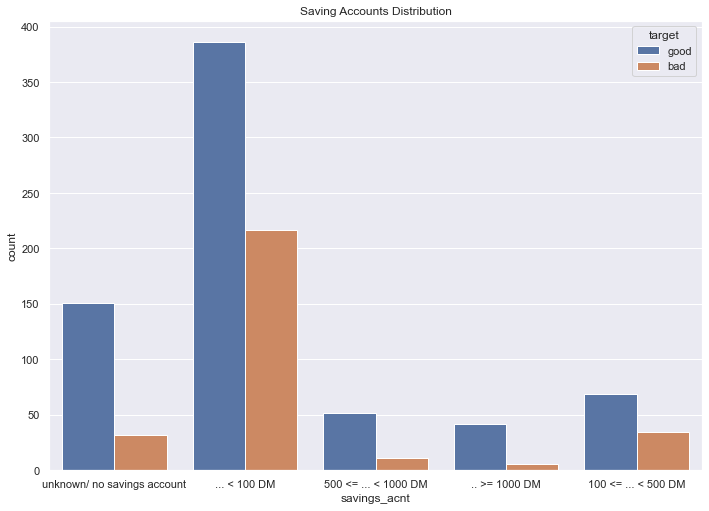

In [21]:
sns.countplot(x='savings_acnt', data=df_viz, hue='target')
plt.title('Saving Accounts Distribution')
plt.show()

#### Most of the bad customers hold the savings account with <100 DM in it.

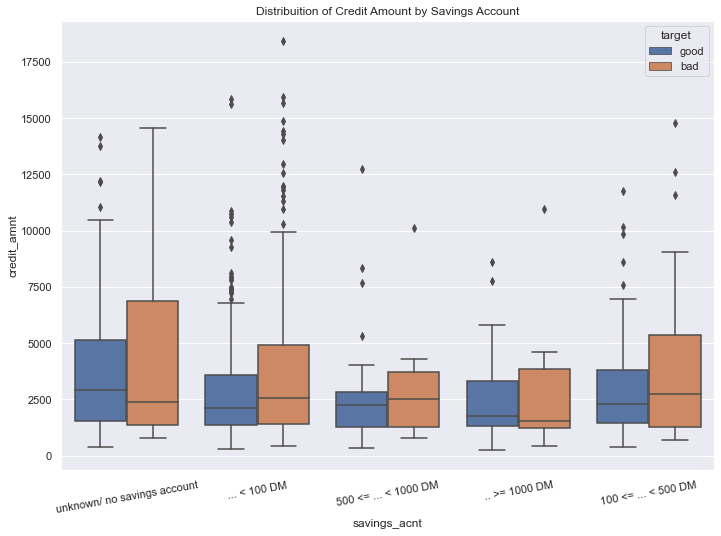

In [22]:
sns.boxplot(x='savings_acnt', y='credit_amnt', data=df_viz, hue='target')
plt.title('Distribuition of Credit Amount by Savings Account')
plt.xticks(rotation=10)
plt.show()

#### People with savings account and having 1 to 1000 DM have taken higher credits compared to the others in the defaulter category.
#### Deafualters have a significant less age in categories of saving account type other than '>1000 DM'.

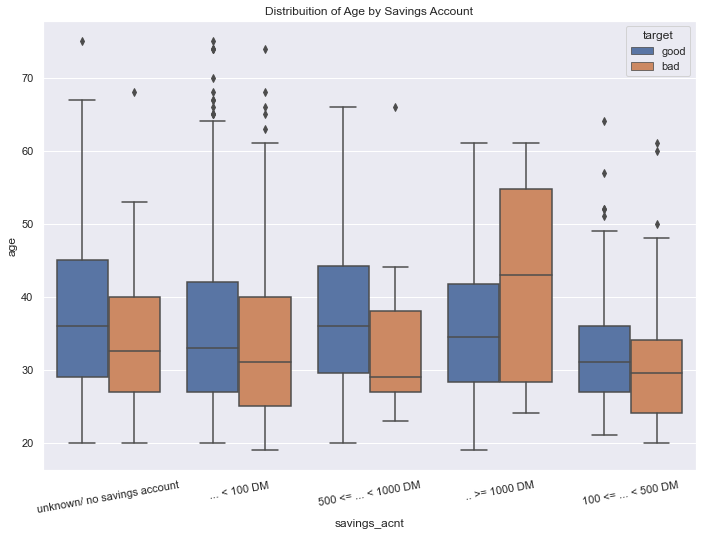

In [23]:
sns.boxplot(x='savings_acnt', y='age', data=df_viz, hue='target')
plt.title('Distribuition of Age by Savings Account')
plt.xticks(rotation=10)
plt.show()

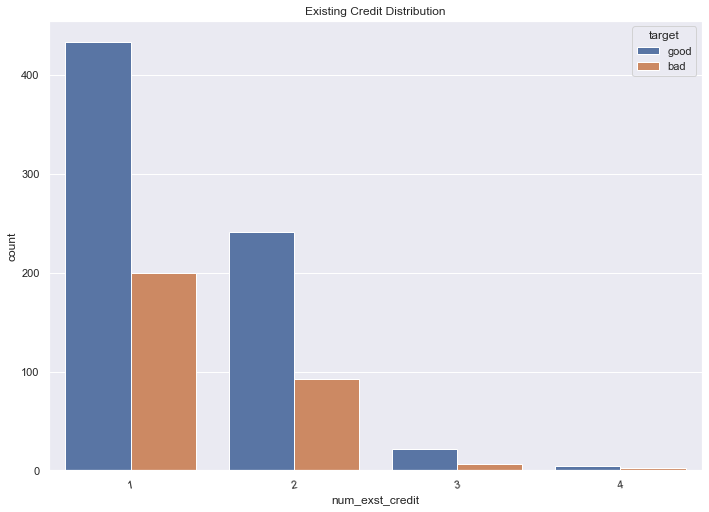

In [24]:
sns.countplot(x='num_exst_credit', data=df_viz, hue='target')
plt.title('Existing Credit Distribution')
plt.xticks(rotation=10)
plt.show()

#### Number of existing credit doesnt seem to determine the good/bad behaviour of the customer.

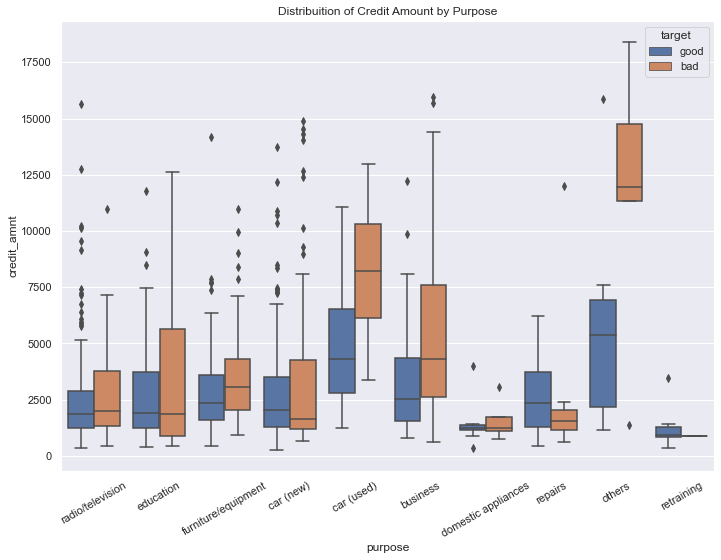

In [25]:
sns.boxplot(x='purpose', y='credit_amnt', data=df_viz, hue='target')
plt.title('Distribuition of Credit Amount by Purpose')
plt.xticks(rotation=30)
plt.show()

#### Most of the defaulting happened with the customer whose purpose where getting an used car, business, education and others, etc. with the defaulters median credit amount higher than the non defaulters.

/Users/akash/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/akash/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


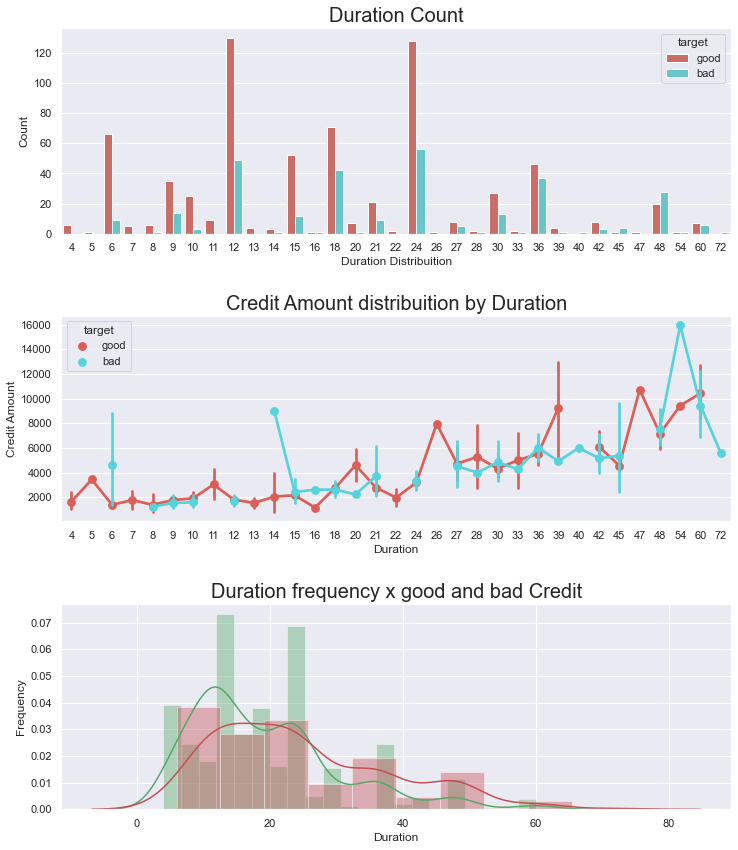

In [26]:
plt.figure(figsize = (12,14))

g= plt.subplot(311)
g = sns.countplot(x="duration_mth", data=df_viz, 
              palette="hls",  hue = "target")
g.set_xlabel("Duration Distribuition", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Duration Count", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.pointplot(x="duration_mth", y ="credit_amnt",data=df_viz,
                   hue="target", palette="hls")
g1.set_xlabel("Duration", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)
g1.set_title("Credit Amount distribuition by Duration", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(df_viz[df_viz['target']=='good']["duration_mth"], color='g')
g2 = sns.distplot(df_viz[df_viz['target']=='bad']["duration_mth"], color='r')
g2.set_xlabel("Duration", fontsize=12)
g2.set_ylabel("Frequency", fontsize=12)
g2.set_title("Duration frequency x good and bad Credit", fontsize=20)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

#### We can see that the highest duration have the high amounts. The highest density is between [12 ~ 18 ~ 24] months.

In [27]:
rcParams['figure.figsize'] = 11.7,8.27

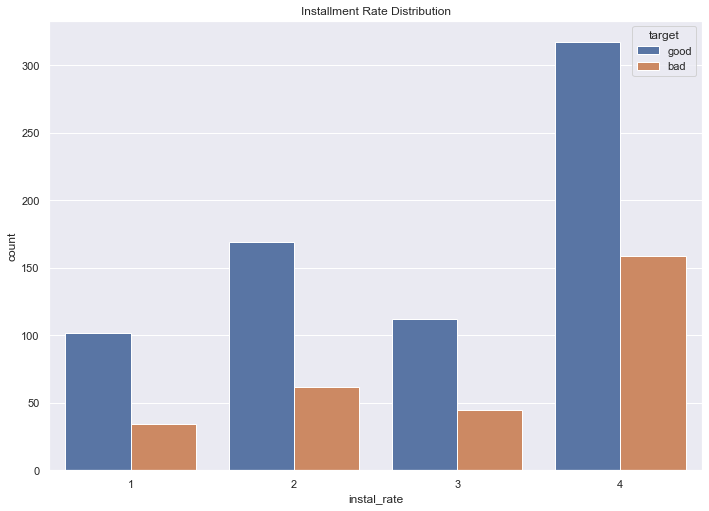

In [28]:
sns.countplot(x='instal_rate', data=df_viz, hue='target')
plt.title('Installment Rate Distribution')
plt.show()

#### More number of non credit worth customers are the one having the higher installment rate.

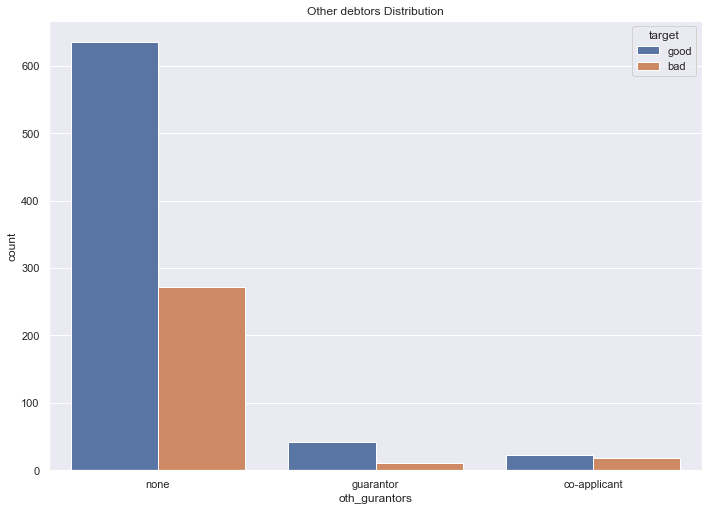

In [29]:
sns.countplot(x='oth_gurantors', data=df_viz, hue='target')
plt.title('Other debtors Distribution')
plt.show()

#### Most of the bad customers doesn't have any gurantors.

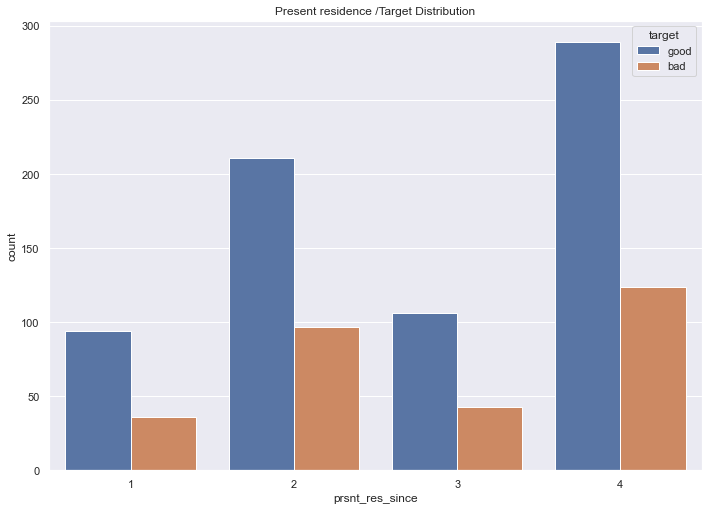

In [30]:
sns.countplot(x='prsnt_res_since', data=df_viz, hue='target')
plt.title('Present residence /Target Distribution')
plt.show()

#### There is no such significance which can be seen from the dependence of present residence time on determing the customer behaviour.

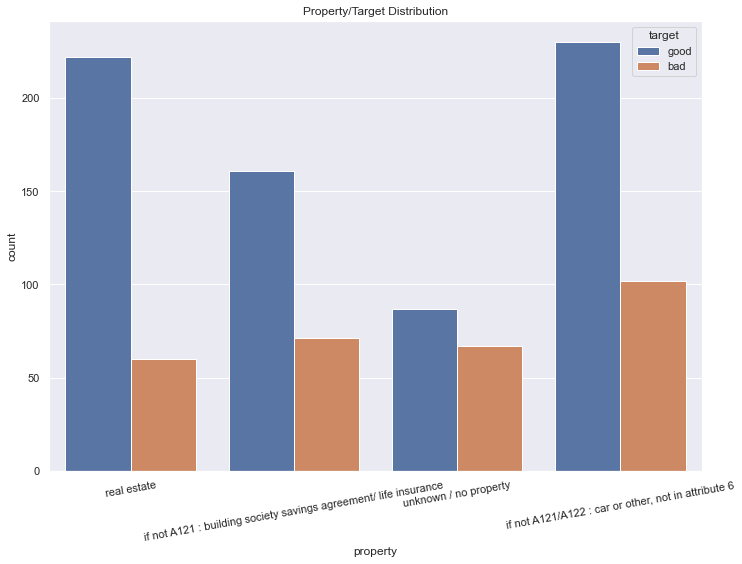

In [31]:
sns.countplot(x='property', data=df_viz, hue='target')
plt.title('Property/Target Distribution')
plt.xticks(rotation=10)
plt.show()

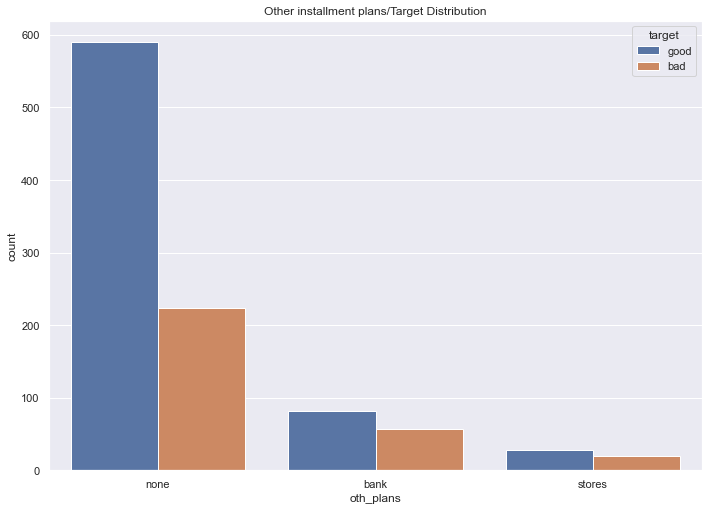

In [32]:
sns.countplot(x='oth_plans', data=df_viz, hue='target')
plt.title('Other installment plans/Target Distribution')
plt.show()

#### Customers who have other installment plans such as bank/stores are more likely to be defaulters.

### Statistical test to get significant features

#### Defining function for chi-square test to test relationship between categorical varibles and annova to determine the same when numerical fetaure is paased.

In [33]:
from scipy import stats

def chi_square_test(col):
    contingency_table = pd.crosstab(df[col],df["target"])
    print('contingency_table :-\n',contingency_table)
    #Observed Values
    Observed_Values = contingency_table.values 
    print("Observed Values :-\n",Observed_Values)
    b=stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    print("Expected Values :-\n",Expected_Values)
    no_of_rows=len(contingency_table.iloc[:,0])
    no_of_columns=len(contingency_table.iloc[0,:])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom:-",ddof)
    alpha = 0.05
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square statistic:-",chi_square_statistic)
    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    print('critical_value:',critical_value)
    #p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    print('p-value:',p_value)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',ddof)
    print('chi-square statistic:',chi_square_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
    if chi_square_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")

    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
        return 1
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
        return 0
        
def annova(col):
    col1 = col
    col2 = 'target'
    df_anova = df[[col1,col2]]
    grps = pd.unique(df_anova.target.values)
    d_data = {grp:df_anova[col1][df_anova.target == grp] for grp in grps}

    F, p = stats.f_oneway(d_data[1], d_data[2])
    print("p-value for significance is: ", p)
    if p<0.05:
        print("reject null hypothesis")
        return 1
    else:
        print("accept null hypothesis")
        return 0

In [34]:
lst = []
for i,column in enumerate(df.columns[:-1]):
    print(str(i)+'. Test for column :'+column.upper())
    print('-------------------------------------------------')
    if df[column].dtype=='int64':
        val = annova(column)
    else:
        val = chi_square_test(column)
    lst.append(val)
    print('\n')

0. Test for column :STATUS_OF_EXST_CHECKING_ACNT
-------------------------------------------------
contingency_table :-
 target                          1    2
status_of_exst_checking_acnt          
A11                           139  135
A12                           164  105
A13                            49   14
A14                           348   46
Observed Values :-
 [[139 135]
 [164 105]
 [ 49  14]
 [348  46]]
Expected Values :-
 [[191.8  82.2]
 [188.3  80.7]
 [ 44.1  18.9]
 [275.8 118.2]]
Degree of Freedom:- 3
chi-square statistic:- 123.7209435162656
critical_value: 7.814727903251179
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  3
chi-square statistic: 123.7209435162656
critical_value: 7.814727903251179
p-value: 0.0
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


1. Test for column :DURATION_MTH
-------------------------------------------------
p-value for significance is:  6.48804

In [35]:
for i,column in enumerate(df.columns[:-1]):
    if lst[i]==0:
        print(str(i)+'. There is no relationship between '+column.upper()+' and the taget/response variable.')
    else:
        print(str(i)+'. There is a relationship between '+column.upper()+' and the taget/response variable.')

0. There is a relationship between STATUS_OF_EXST_CHECKING_ACNT and the taget/response variable.
1. There is a relationship between DURATION_MTH and the taget/response variable.
2. There is a relationship between CREDIT_HIST and the taget/response variable.
3. There is a relationship between PURPOSE and the taget/response variable.
4. There is a relationship between CREDIT_AMNT and the taget/response variable.
5. There is a relationship between SAVINGS_ACNT and the taget/response variable.
6. There is a relationship between EMPLOYMENT_SINCE and the taget/response variable.
7. There is a relationship between INSTAL_RATE and the taget/response variable.
8. There is a relationship between STATUS and the taget/response variable.
9. There is a relationship between OTH_GURANTORS and the taget/response variable.
10. There is no relationship between PRSNT_RES_SINCE and the taget/response variable.
11. There is a relationship between PROPERTY and the taget/response variable.
12. There is a rela

In [36]:
print(lst)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1]
